<a href="https://colab.research.google.com/github/dataqueenpend/Case-Studies/blob/main/Case_Study_School_Budgeting_with_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: School Budgeting with Machine Learning in Python

 You'll explore a problem related to school district budgeting. By building a model to automatically classify items in a school's budget, it makes it easier and faster for schools to compare their spending with other schools.

 *You'll begin by building a baseline model that is a simple, first-pass approach. In particular, you'll do some natural language processing to prepare the budgets for modeling. 
 
 * Next, you'll have the opportunity to try your own techniques and see how they compare to participants from the competition. 
 
 * Finally, you'll see how the winner was able to combine a number of expert techniques to build the most accurate model.

 Case study with DataCamp. Performed by myself.

##Exploring the raw data

*How can we accurately classify line-items in a school budget based on what that money is being used for?* 

We will explore the raw text and numeric values in the dataset, both quantitatively and visually. And we'll learn how to measure success when trying to predict class labels for each row of the dataset.


> **bring the power of data science to social impact organizations**

* running online data science challenges for non-profits, NGOs, and social enterprises.

*What we'll be brainstorming on here?*

We'll work through one of these competitions as a case-study, and we'll show you how the winner achieved the best score. 

* do some natural language processing, 
* some feature engineering, 
* and boost computational efficiency. 

*In addition to these pro-tips, we'll look at one of the ways in which we can use data to have a social impact.*

Let's see what's in the challenge!

> School budgets in the United States are incredibly complex, and there are no standards for reporting how money is spent. 

* Schools want to be able to measure their performance
  * for example, are we spending more on textbooks than our neighboring schools, and is that investment worthwhile?

to do this comparison takes **hundreds of hours each year** in which analysts hand-categorize each line-item.

*Our goal is to build a machine learning algorithm that can automate that process.*

* For each line item, we have some text fields that tell us about the expense--
  * for example, a line might say something like "Algebra books for 8th grade students". We also have the amount of the expense in dollars. 

*  This line item then has a set of labels attached to it. 
  * For example, this one might have labels like "Textbooks," "Math," and "Middle School." These labels are our target variable 

> This is a **supervised learning problem** where we want to use correctly labeled data to build an algorithm that can suggest labels for unlabeled lines. 

 This is in contrast to an unsupervised learning problem where we don't have labels, and we are using an algorithm to automatically which line-items might go together.


* we have over 100 unique target variables that could be attached to a single line item.
  * we want to predict a category for each line item, this is a **classification problem**.

This is as opposed to a regression problem where we want to predict a numeric value for a line item--for example, predicting house prices. 


*Here are some of the actual categories that we need to determine:*
* Is this expense for pre-kindergarten education (which is important because it has different funding sources)? 
* Is there a particular Student_Type that this expense supports?




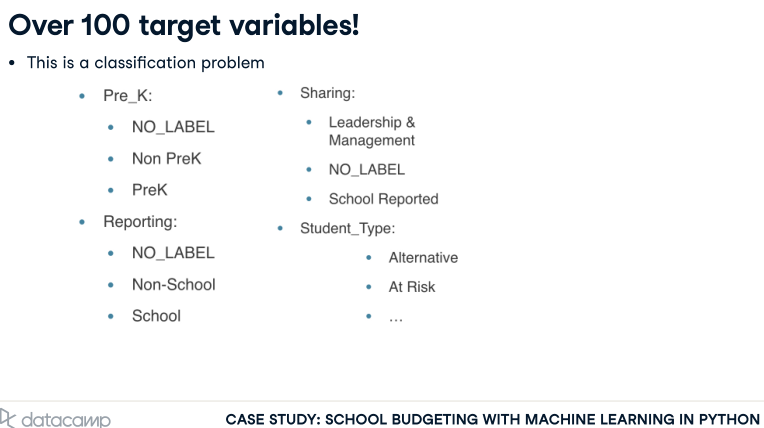



 there are **9 columns** with many different possible categories in each column.

**How we can help?**

> If you talk to the people who actually do this work, it is **impossible for a human to label these line items with 100% accuracy**.

 To take this into account, we don't want our algorithm to just say "This line is for textbooks." **We want the algorithm to say: "It's most likely this line is for textbooks, and I'm 60% sure that it is. If it's not textbooks, I'm 30% sure it's 'office supplies.'"** By making these suggestions, analysts can prioritize their time. This is called a **human-in-the-loop machine learning system**.

 * We will predict a probability between 0 (the algorithm thinks this label is very unlikely for this line item) and 1 (the algorithm thinks this label is very likely).

 ###Exploring the data

 If we are predicting probabilities, **we need a value for each possible value in each column**. 
  * In this case, the target would have the columns for each hair type and for each eye color. 

  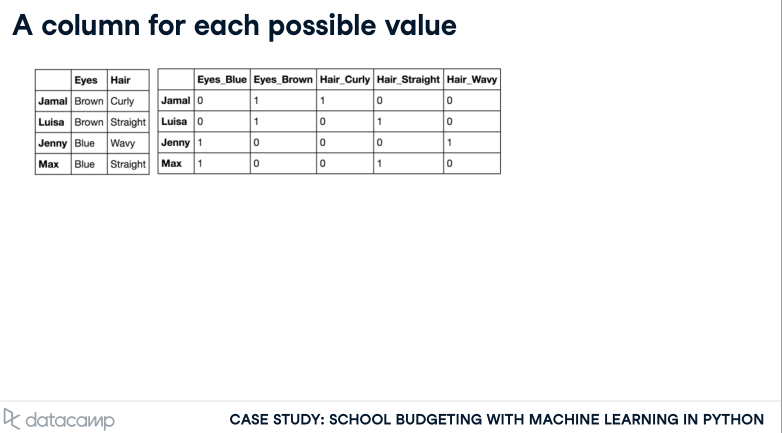

**Loading the data**

We'll use pandas to load the data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

(for this case study - DataCamp didn't share the dataset - because of that, we'll unfortunately we'll be doing all the code only in "sample mode")



In [ ]:
df = pd.read_csv('TrainingData.csv', index_col=0)

df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
Facility_or_Department    252 non-null object
Position_Extra            1026 non-null object
Total                     1542 non-null float64
Program_Description       1192 non-null object
Fund_Description          819 non-null object
Text_1                    1132 non-null object
dtypes: float64(2), object(23)
memory usage: 356.9+ KB

In [5]:
df.head()
Out[5]:

                    Function          Use          Sharing   Reporting Student_Type Position_Type               Object_Type     Pre_K   Operating_Status  ... Location_Description  FTE                  Function_Description      Facility_or_Department Position_Extra     Total                                Program_Description                                   Fund_Description                Text_1
198                 NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN  Care and Upkeep of Building Services                         NaN            NaN  -8291.86                                                NaN  Title I - Disadvantaged Children/Targeted Assi...    TITLE I CARRYOVER 
209   Student Transportation     NO_LABEL  Shared Services  Non-School     NO_LABEL      NO_LABEL    Other Non-Compensation  NO_LABEL  PreK-12 Operating  ...      ADMIN. SERVICES  NaN             STUDENT TRANSPORT SERVICE                         NaN            NaN    618.29                               PUPIL TRANSPORTATION                                       General Fund                   NaN
750     Teacher Compensation  Instruction  School Reported      School  Unspecified       Teacher  Base Salary/Compensation  Non PreK  PreK-12 Operating  ...                  NaN  1.0                                   NaN                         NaN        TEACHER  49768.82                              Instruction - Regular                             General Purpose School                   NaN
931                 NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN                           Instruction  Instruction And Curriculum            NaN     -1.02  "Title I, Part A Schoolwide Activities Related...                             General Operating Fund                   NaN
1524                NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN            Other Community Services *                         NaN            NaN   2304.43                                                NaN  Title I - Disadvantaged Children/Targeted Assi...   TITLE I PI+HOMELESS

[5 rows x 25 columns]


In [6]:
df.tail()
Out[6]:

                        Function          Use                  Sharing   Reporting       Student_Type Position_Type                 Object_Type     Pre_K   Operating_Status  ...  Location_Description  FTE                   Function_Description Facility_or_Department               Position_Extra       Total            Program_Description                Fund_Description                         Text_1
344986   Substitute Compensation  Instruction          School Reported      School        Unspecified    Substitute                    Benefits  NO_LABEL  PreK-12 Operating  ...                   NaN  NaN                UNALLOC BUDGETS/SCHOOLS                    NaN   PROFESSIONAL-INSTRUCTIONAL    27.04000  GENERAL HIGH SCHOOL EDUCATION                             NaN            REGULAR INSTRUCTION
384803                  NO_LABEL     NO_LABEL                 NO_LABEL    NO_LABEL           NO_LABEL      NO_LABEL                    NO_LABEL  NO_LABEL      Non-Operating  ...  PERSONNEL-PAID LEAVE  NaN                            NON-PROJECT                    NaN   PROFESSIONAL-INSTRUCTIONAL         NaN                 STAFF SERVICES                             NaN                        CENTRAL
224382   Substitute Compensation  Instruction          School Reported      School  Special Education    Substitute     Substitute Compensation  NO_LABEL  PreK-12 Operating  ...               School   0.0         EXCEPTIONAL                                       NaN                          NaN   200.39000                            NaN  GENERAL FUND                                              NaN
305347  Facilities & Maintenance          O&M  Leadership & Management  Non-School             Gifted     Custodian  Other Compensation/Stipend  Non PreK  PreK-12 Operating  ...           Unallocated  NaN  Facilities Maintenance And Operations    Gifted And Talented  ANY CUS WHO IS NOT A SUPER      5.29000            Gifted And Talented          General Operating Fund  ADDL REGULAR PAY-NOT SMOOTHED
101861      Teacher Compensation  Instruction          School Reported      School            Poverty       Teacher    Base Salary/Compensation  NO_LABEL  PreK-12 Operating  ...                   NaN  NaN                                TITLE I                    NaN   PROFESSIONAL-INSTRUCTIONAL  1575.03504   GENERAL ELEMENTARY EDUCATION                             NaN            REGULAR INSTRUCTION

[5 rows x 25 columns]

Some of the column names correspond to features - descriptions of the budget items - such as the Job_Title_Description column. *The values in this column tell us if a budget item is for a teacher, custodian, or other employee.*

Some columns correspond to the budget **item labels we will be trying to predict with our model**. 
  * For example, the Object_Type column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.


**Summarizing the data**

We'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. 

there are two numeric columns, called FTE and Total.

* ```FTE```: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
* ```Total```: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.


In [ ]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

In [ ]:
<script.py> output:
                  FTE         Total
    count  449.000000  1.542000e+03
    mean     0.493532  1.446867e+04
    std      0.452844  7.916752e+04
    min     -0.002369 -1.044084e+06
    25%      0.004310  1.108111e+02
    50%      0.440000  7.060299e+02
    75%      1.000000  5.347760e+03
    max      1.047222  1.367500e+06

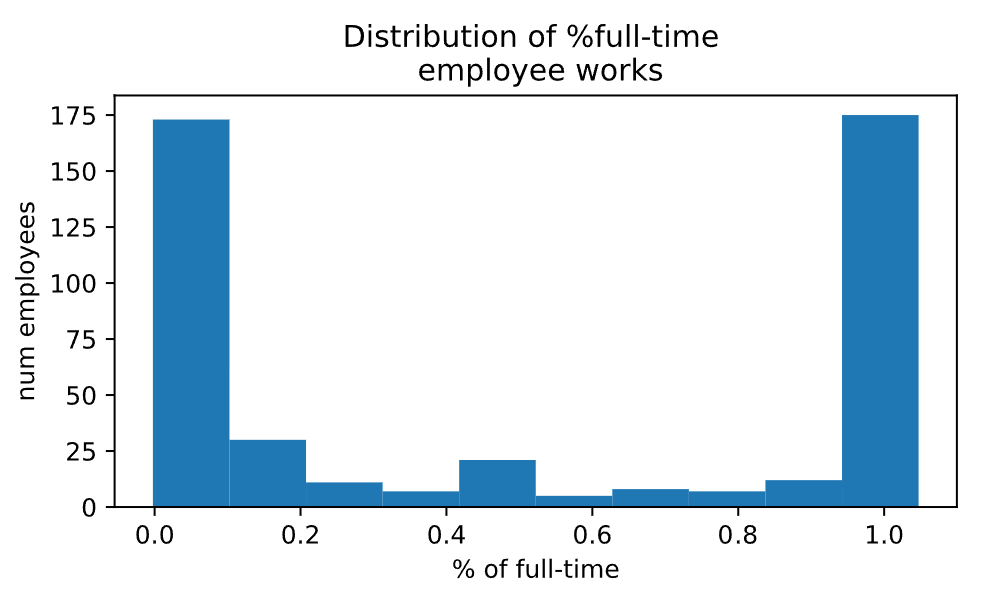

> The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.


###Looking at the datatypes

We've seen we have some numeric values and some text values in our dataset. It's common to have data where each value is from a known set of categories.

In [ ]:
df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
Facility_or_Department    252 non-null object
Position_Extra            1026 non-null object
Total                     1542 non-null float64
Program_Description       1192 non-null object
Fund_Description          819 non-null object
Text_1                    1132 non-null object
dtypes: float64(2), object(23)
memory usage: 356.9+ KB

For example, a column season_of_year may have the values winter, spring, summer, and fall. These kinds of data are not simply strings. 

If we look at the label column, we can see that it takes either the value a or the value b.

**Encode labels as categories**

**Machine learning algorithms work on numbers**, so we need a numeric representation of these strings before we can do any sort of model-fitting. 

 The second problem is that **strings can be slow**. We never know ahead of time how long a string is, so our computers have to take more time processing strings than numbers, which have a precise number of bits. 

  In pandas, there is a **special datatype called category that encodes our categorical data numerically**,  and--because of this numerical encoding--it can speed up our code.

  In pandas, we can call the ```astype``` function with the string category to change a column's type from object to category.

  Here are two rows of the 'label' column from the sample dataframe. 

In [ ]:
sample_df.label.head(2)

In [ ]:
0 a
1 b
Name: label, dtype: object

When the data is loaded, pandas assumes that these variables are strings, so the dtype is object. 

> By calling astype('category'), we are returned a categorical variable. 

In [ ]:
sample_df.label = sample_df.label.astype('category')
sample_df.label.head(2)

In [ ]:
0 a
1 b
Name: label, dtype: category
Categories (2, object): [a, b]

As we can see, pandas is already smarter about the values that appear in the column--in this case, the two values a and b.

**Dummy variable encoding**

To see this numeric representation, we can use the ```get_dummies``` function in pandas.

In [ ]:
dummies = pd.get_dummies(sample_df[['label']], prefix_sep='_')
dummies.head(2)

In [ ]:
label_a label_b
0 1 0
1 0 1

This is called ```get_dummies``` because this process is called creating "dummy variables". 

Our dummy variables dataframe has two columns: 
* the first, if the value is "label_a," 
* the second if the value is "label_b." 

Each row contains a 1 if that row is of that category, and a 0 if not. This is also called a "binary indicator" representation. 

> Note that the ```prefix_sep``` parameter is useful to tell the get_dummies function what character should separate the original column name and the column value for our dummy variable.

**Lambda functions**

Before going further, we'll go with a quick review of lambda functions. Which are a substitute of a regular functions - means in one line we can create a usable functions, whenever we need it. 

For example, we may want a function that squares a variable. We can define a lambda function that takes a parameter, the variable x. The function itself just multiplies x by x and returns the result. 

We can call this function just like any other Python function, and it returns whatever the one line of code evaluates to.



In [ ]:
square = lambda x: x*x
square(2)

4

**Encode labels as categories**

At the budget data that there are multiple columns we want to make categorical. To make multiple columns into categories, we need to apply the function to each column separately. 

So you probably know now, why we've reviewed the lambda's :) We will use a small lambda function to convert each column to a category. 

In [ ]:
categorize_label = lambda x: x.astype('category')

We then use the apply method on a pandas dataframe to apply this function to each of the relevant columns separately by passing the axis equals 0 parameter. 

In [ ]:
sample_df.label = sample_df[['label']].apply(categorize_label, axis=0)
sample_df.info()

In [ ]:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
label 100 non-null category
numeric 100 non-null float64
text 100 non-null object
with_missing 95 non-null float64
dtypes: category(1), float64(2), object(1)
memory usage: 3.2+ KB

**Encode the labels as categorical variables**

Remember that, if you want to check the datatypes you must do it differently within Dataframe:

In [ ]:
df.value_counts()

and withing Pandas Series:

In [ ]:
df.dtypes.value_counts()

Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient object type.

 Does this include the labels you're trying to predict? Let's find out!

 There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using df[LABELS].dtypes.

 

In [ ]:
df[LABELS].dtypes

In [ ]:
Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the ```.astype()``` method.

> Note: ```.astype()``` **only works on a pandas Series!**. Since you are working with a pandas DataFrame, you'll need to use the ```.apply()``` method and provide a lambda function called categorize_label that applies ```.astype()``` to each column, x.

In [ ]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

In [ ]:
    Function            category
    Use                 category
    Sharing             category
    Reporting           category
    Student_Type        category
    Position_Type       category
    Object_Type         category
    Pre_K               category
    Operating_Status    category
    dtype: object

**Counting unique labels**

Now we'll check out those 100 unique labels, by counting and plotting unique values for each category label. 

The dataframe df and the LABELS list have been loaded into the workspace; the LABELS columns of df have been converted to category types.

pandas, which has been pre-imported as pd, provides a pd.Series.nunique method for counting the number of unique values in a Series.

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique, axis=0)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

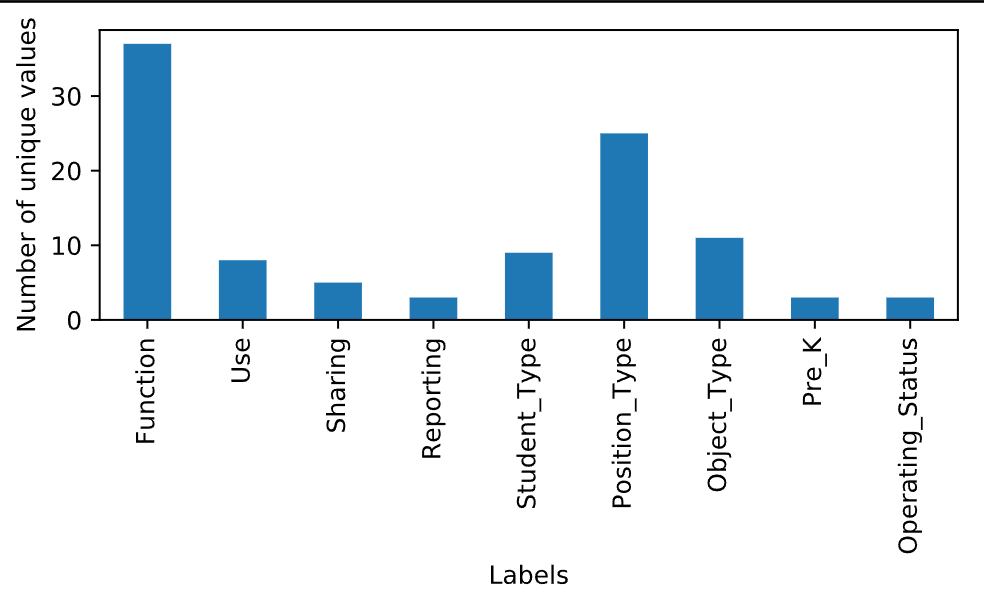

>  That's a lot of labels to work with. How will you measure success with these many labels?

**How do we measure success?**

Choosing how to evaluate your machine learning model is one of the most important decisions an analyst makes. The decision balances the real-world use of the algorithm, the mathematical properties of the evaluation function, and the interpretability of the measure.

**"how accurate is your model?"**

Accuracy is a simple measure that tells us what percentage of rows we got right. However, sometimes **accuracy doesn't tell the whole story**. 

>  Consider the case of identifying spam emails. Let's say that only 1% of the emails I receive are spam. The other 99% are legitimate emails. I can build a classifier that is 99% accurate just by assuming every message is legitimate, and never marking any message as spam. But this model isn't useful at all because every message, even the spam, ends up in my inbox. 

*The metric we use for this problem is called log loss.*

Log loss is what is generally called a "loss function," and **it is a measure of error**. We want our error to be as small as possible, which is the opposite of a metric like accuracy, where we want to maximize the value.

**Log loss binary classification**

Let's look at how logloss is calculated.
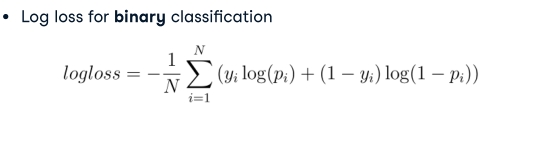

 It takes the actual value, 1 or 0, and it takes our prediction, which is a probability between 0 and 1.

 > The greek letter sigma (which looks like an uppercase E below) indicates that we're taking the sum of the logloss measures for each row of the dataset.

 We then multiply this sum by -1 over N, the number of rows, to get a single value for loss. 

 Let's see this on example
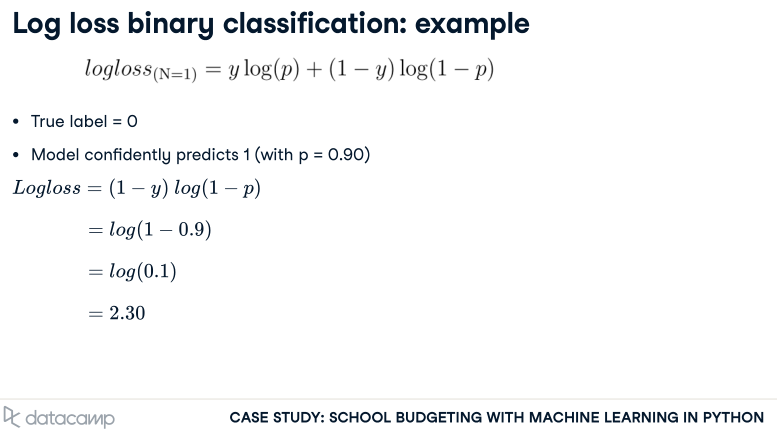

 Consider the case where the true label is 0, but we predict confidently that the label is 1. In this case, because y is 0, the first term becomes 0. This means the logloss is calculated by (1 - y) times log(1 - p). This simplifies to log(1 - 0-point-9) or log(0-point-1), which is 2-point-3. 

Now, consider the case that the correct label is 1, but our model is not sure and our prediction is right in the middle (0-point-5). Our logloss is 0-point-69. 

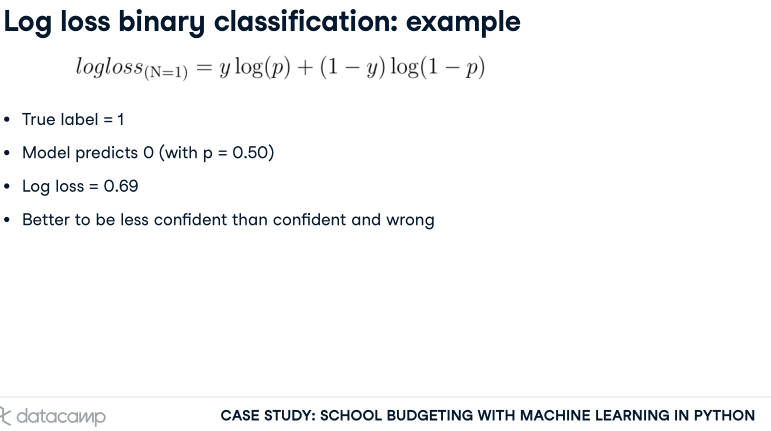

Since We are trying to minimize log loss, we can see that it is better to be less confident than it is to be confident and wrong.

**Computing log loss with NumPy**

Here is an implementation of logloss.

In [ ]:
import numpy as np
def compute_log_loss(predicted, actual, eps=1e-14):
  """ Computes the logarithmic loss between predicted and
  actual when these are 1D arrays.

  :param predicted: The predicted probabilities as floats between 0-1
  :param actual: The actual binary labels. Either 0 or 1.
  :param eps (optional): log(0) is inf, so we need to offset our
                        predicted values slightly by eps from 0 or 1.
  """
  predicted = np.clip(predicted, eps, 1 - eps)
  loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
  return loss

The most important detail is the clip function which sets a maximum and minimum value for the elements in an array. 

Since log(0) is negative infinity, we want to offset our predictions ever so slightly from being exactly 1 or exactly 0 so that our score remains a real number. 

In this example we use the eps variable to be 0-point-00 (thirteen zeros) 1, which is close enough to zero to not effect our overall scores. After adjusting the predictions slightly with clip, we calculate logloss using the formula.

> If we call this function on the examples we looked at earlier, we can see that the confident and wrong item returns the expected value of 2-point-3 and the prediction that is right in the middle returns 0-point-69. 

In [ ]:
compute_log_loss(predicted=0.9, actual=0)

2.302585092994046

In [ ]:
compute_log_loss(predicted=0.5, actual=1)

0.6931471805599453

**Computing log loss with NumPy**

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss().

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values, actual_values). It takes the predicted values as the first argument and the actual values as the second argument.



In [ ]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


In [ ]:
    Log loss, correct and confident: 0.05129329438755058
    Log loss, correct and not confident: 0.4307829160924542
    Log loss, wrong and not confident: 1.049822124498678
    Log loss, wrong and confident: 2.9957322735539904
    Log loss, actual labels: 9.99200722162646e-15

>  Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models. 





##Creating a simple first model

We'll use numeric data only to train the model. Remember to split the data!

*  how to format the predictions. 
* introduction to natural language processing (NLP) in order to start working with the large amounts of text in the data.

When approaching a machine learning problem, and in particular looking at a dataset from a machine learning competition, it's always a good approach to start with a very simple model. 

*Creating a simple model first helps to give us a sense of how challenging a question actually is*. Before we dig deep into complex models where many more things can go wrong, we want to understand how much signal we can pull out using basic methods.

**We'll start with a model that just uses the numeric data columns.**

In building our first model, we want to go from raw data to predictions as quickly as possible. In this case, **we'll use multi-class logistic regression**, which treats each label column as independent. 

**The model will train a logistic regression classifier for each of these columns separately and then use those models to predict whether the label appears or not for any given rows.**

After writing out our predictions to a CSV, we'll simulate submitting them to the competition and seeing what our score would be.

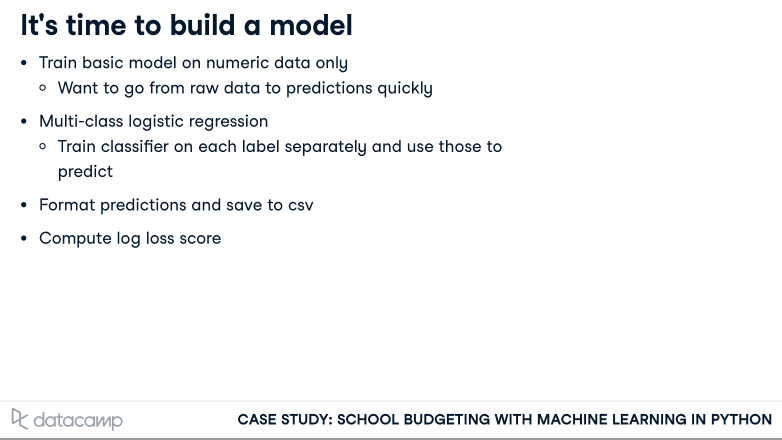



**Splitting the multi-class dataset**

*Because of the nature of our data, the simple approach to a train-test split won't work.*

 > Some labels that only appear in a small fraction of the dataset. If we split our dataset randomly, we may end up with labels in our test set that never appeared in our training set. Our model won't be able to predict a class that it has never seen before!

 One approach to this problem is called **StratifiedShuffleSplit**. However, this scikit-learn function **only works if you have a single target variable**. *In our case, we have many target variables*.

 To work around this issue, we've provided a utility function, multilabel_train_test_split, that will ensure that all of the classes are represented in both the test and training sets. 

 First, we'll subset our data to just the numeric columns. NUMERIC_COLUMNS is a variable we provide that contains a list of the column names for the columns that are numbers rather than text.

 Then we'll do a minimal amount of preprocessing where we fill the NaNs that are in the dataset with -1000. 

> In this case, we choose -1000, because we want our algorithm to respond to NaN's differently than 0.   

In [ ]:
data_to_train = df[NUMERIC_COLUMNS].fillna(-1000)

We'll create our array of target variables using the get_dummies function in pandas. Again, the get_dummies function takes our categories, and produces a binary indicator for our targets, which is the format that scikit-learn needs to build a model.

In [ ]:
labels_to_use = pd.get_dummies(df[LABELS])

Finally, we use the multilabel_train_test_split function that is provided to split the dataset in to a training set and a test set.

In [ ]:
X_train, X_test, y_train, y_test = multilabel_train_test_split(data_to_train, labels_to_use, size=0.2, seed=123)

**Training the model**

Now we can import our standard LogisticRegression classifier from sklearn dot linear_model. We'll also import the OneVsRestClassifier from the sklearn dot multiclass module. 

> OneVsRest let's us treat each column of y independently.

Essentially, it fits a separate classifier for each of the columns. This is just one strategy you can use if you have multiple classes. 

Now we can train that classifier by calling fit and passing our features in X_train and the corresponding labels that are in y_train.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

**Setting up a train-test split in scikit-learn**

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least min_count examples of each label appear in each split: multilabel_train_test_split.

 ```multilabel_train_test_split```: 

 ```
 def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])
```

You'll start with a simple model that uses just the numeric columns of your DataFrame when calling multilabel_train_test_split. The data has been read into a DataFrame df and a list consisting of just the numeric columns is available as NUMERIC_COLUMNS.

In [ ]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,label_dummies, size=0.2, seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

In [ ]:
<script.py> output:
    X_train info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1040 entries, 198 to 101861
    Data columns (total 2 columns):
    FTE      1040 non-null float64
    Total    1040 non-null float64
    dtypes: float64(2)
    memory usage: 24.4 KB
    None
    
    X_test info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 520 entries, 209 to 448628
    Data columns (total 2 columns):
    FTE      520 non-null float64
    Total    520 non-null float64
    dtypes: float64(2)
    memory usage: 12.2 KB
    None
    
    y_train info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1040 entries, 198 to 101861
    Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
    dtypes: uint8(104)
    memory usage: 113.8 KB
    None
    
    y_test info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 520 entries, 209 to 448628
    Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
    dtypes: uint8(104)
    memory usage: 56.9 KB
    None

**Training a model**

In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the NUMERIC_COLUMNS of your feature data.

Then you'll test and print the accuracy with the ```.score()``` method to see the results of training.

Before you train! Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

In [ ]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

In [ ]:
<script.py> output:
    Accuracy: 0.0

> The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

###Making predictions

Once our classifier is trained, we can use it to make predictions on new data. We could use our test set that we've withheld, but we want to simulate actually competing in a data science competition, so we will make predictions on the holdout set that the competition provides. 

As we did with our training data, we load the holdout data using the read_csv function from pandas. We then perform the same simple preprocessing we used earlier.

First, we select just the numeric columns. Then we use fillna to replace NaN values with -1000.Finally, we call the predict_proba method on our trained classifier. 

In [ ]:
holdout = pd.read_csv('HoldoutData.csv', index_col=0)
holdout = holdout[NUMERIC_COLUMNS].fillna(-1000)
predictions = clf.predict_proba(holdout)

Remember, we want to predict probabilities for each label, not just whether or not the label appears. If we simply used the predict method instead, we would end up with a 0 or 1 in every case. Because log loss penalizes you for being confident and wrong, the score for this submission would be significantly worse than if we use predict_proba.

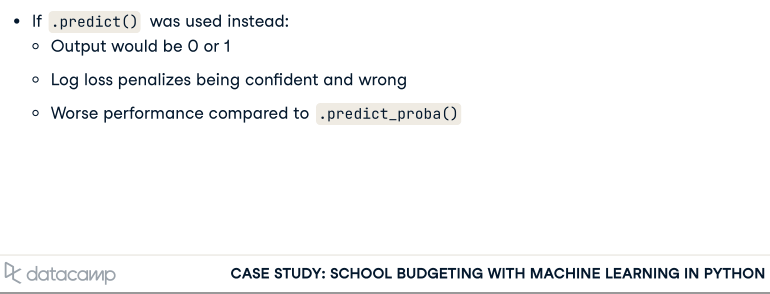

**Submitting your predictions as a csv**

*In data science competitions, it's a standard practice to write your predictions as a CSV and then upload that CSV to the competition platform.*

From the competition documentation, we can see that the submission format for this competition expects a dataframe that has each of the individual labels as the column headers and probabilities for each of the columns. The to_csv function on a DataFrame, will take our predictions and write them out to a file. 



In [ ]:
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS], prefix_sep='__').columns, index=holdout.index, data=predictions)
prediction_df.to_csv('predictions.csv')
score = score_submission(pred_path='predictions.csv')

> you'll notice that our columns have the original column name separated from the value by two underscores. This is because some of the column names already contained single a underscore.

**Format and submit predictions**

The predictions that were generated by predict_proba is just an array of values. It doesn't have column names or an index like our submission format does. We'll fix this by turning those values into a DataFrame. 


To get the column names, we use get_dummies on our target variables and then borrow those column names for our new dataframe. Our index will be the same index that we read into pandas with read_csv, and the data is the predictions themselves. 


As we noted in the previous slide, we want to separate the original column names from the column values with a double underscore when we call get_dummies. To do this, we will use the keyword argument prefix_sep equals double underscore with the get_dummies function.

 Finally, we can call to_csv and pass the filename of the file we want to write out to disk. We can call the score_submission function that is provided to see how our submission would have scored in the competition!

 **Use your model to predict values on holdout data**

 You're ready to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually see the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label. In this exercise you'll do just that by using the .predict_proba() method on your trained model.

First, however, you'll need to load the holdout data, which is available in the workspace as the file HoldoutData.csv.

In [ ]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

**Writing out your results to a csv for submission**

At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a .csv using the .to_csv() method on a pandas DataFrame. Then you'll evaluate your performance according to the LogLoss metric discussed earlier!

You'll need to make sure your submission obeys the correct format.

To do this, you'll use your predictions values to create a new DataFrame, prediction_df.

Interpreting LogLoss & Beating the Benchmark:

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: 2.0455, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?

In [ ]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='predictions.csv')

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

In [ ]:
Your model, trained with numeric data only, yields logloss score: 1.9067227623381413

> Even though your basic model scored 0.0 accuracy, it nevertheless performs better than the benchmark score of 2.0455. You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up your game and incorporate the text data.

###A very brief introduction to NLP

Some of our data comes in the form or freefrom text. When we have **data that is text, we often want to process this text to create features for our algorithms**. This is called **Natural Language Processing**, or NLP. 

> Data for natural language processing can be text, as it is in our case, entire documents (for example, magazine articles or emails), or transcriptions of human speech.

1. The first step in processing this kind of data is called "tokenization". 

* Tokenization is the process of splitting a long string into segments. 
  * Usually, this means taking a string and splitting it into a list of strings where we have one string for each word. 
    * For example, we might split the string "Natural Language Processing" into a list of three separate tokens: "Natural," "Language," and "Processing".

Let's take a look at an example of actual data from our school budget dataset. We have the full string "PETRO-VEND FUEL AND FLUIDS."
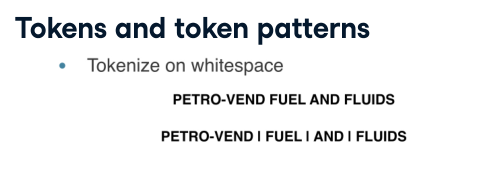




If we want to tokenize on whitespace, that is split into words every time there is a space, tab, or return in the text, we end up with 4 tokens. 
* The token "PETRO-VEND," 
* the token "FUEL,"
* the token "AND,"
* the token "FLUIDS."

 For some datasets, we may want to split words based on other characters than whitespace. For example, in this dataset we may observe that often we have words that are combined with a hyphen, like"PETRO-VEND." We can opt in this case to tokenize on whitespace and punctuation. Here we break into tokens every time we see a space or any mark of punctuation.

 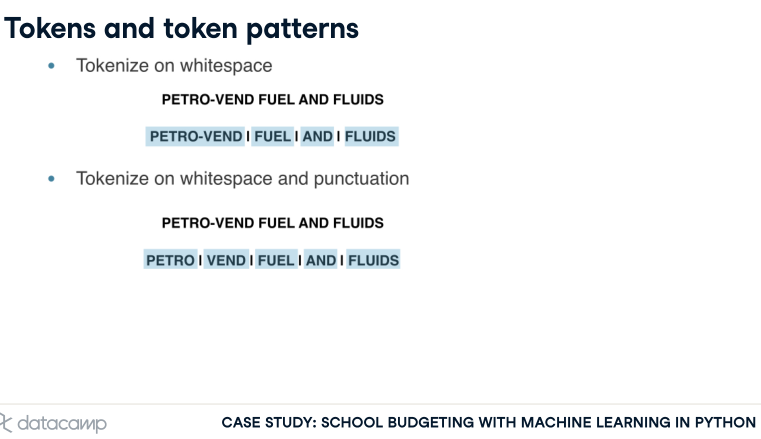

**Bag of words representation**

Now that we have our 5 tokens, we want to use them as part of our machine learning algorithm. Often, the first way to do this is to simply count the number of times that a particular token appears in a row.
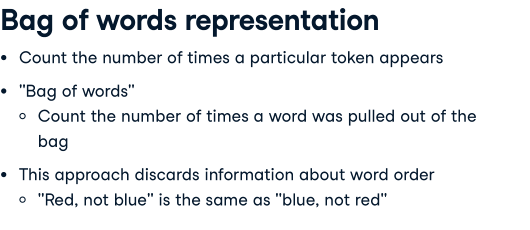


This is called a "bag of words" representation, because you can imagine our vocabulary as a bag of all of our words, and we just count the number of times a particular word was pulled out of that bag. 

If you're following along closely, you may have noticed that **this approach discards information about word order**. That is, the phrase "red, not blue" would be treated the same as "blue, not red." 

A slightly more sophisticated approach is to create what are called **"n-grams."**

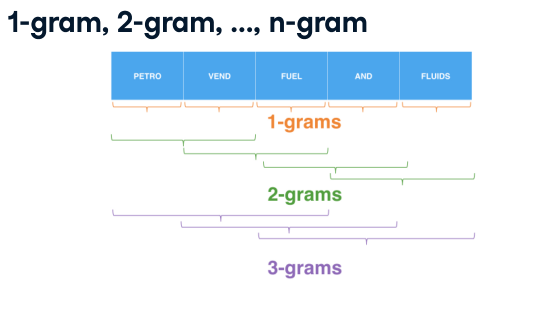

In addition to a column for every token we see, which is called a "1-gram," we may have a column for every ordered pair of two words. In that case, we'd have a column for "PETRO-VEND," a column for "VEND FUEL," a column for "FUEL AND," and a column for "AND FLUIDS." 

These are called 2-grams (or bi-grams). N can be any number, for example, we may also include 3-grams (or tri-grams) in this example. There are three columns for trigrams: one column for "PETRO-VEND FUEL," one for "VEND FUEL AND," and one for "FUEL AND FLUIDS."

###Representing text numerically

Let's talk about how we take the tokenizations we have created and turn them into an array that we can feed into a machine learning algorithm.

**bag-of-words**

This is one of the simplest ways to represent text in a machine learning algorithm. It discards information about grammar and word order, just assuming that the number of times a word occurs is enough information.

**Scikit-learn tools for bag-of-words**

Scikit-learn provides a very useful tool for creating bag-of-words representations. It is called the CountVectorizer. The CountVectorizer works by taking an array of strings and doing three things. 

* First, it tokenizes all of the strings. 
* Then, it makes note of all of the words that appear, which we call the "vocabulary". 
* Finally, it counts the number of times that each token in the vocabulary appears in every given row.

**Using CountVectorizer() on column of main dataset**

The CountVectorizer is part of the text submodule in the feature_extraction module in scikit-learn. After importing the CountVectorizer, we will define a regular expression that does a split on whitespace.

We'll also make sure that our text column does not have any NaN values, simply replacing those with empty strings instead. Finally, we'll create a CountVectorizer object where we pass in the token_pattern that we have created. This creates an object that we can use to create bag-of-words representations of text.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
TOKENS_BASIC = '\\\\S+(?=\\\\s+)'
df.Program_Description.fillna('', inplace=True)
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

The CountVectorizer object that we've created can be used with the fit and transform pattern, just like any other preprocessor in scikit-learn. fit will parse all of the strings for tokens and then create the vocabulary. Here, we use the word vocabulary specifically to mean all of the tokens that appear in this dataset. transform will tokenize the text and then produce the array of counts.

In [ ]:
vec_basic.fit(df.Program_Description)

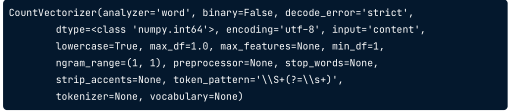

In [ ]:
msg = 'There are {} tokens in Program_Description if tokens are any non-whitespace'
print(msg.format(len(vec_basic.get_feature_names())))

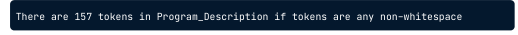

**Creating a bag-of-words in scikit-learn**

In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

You will focus on one feature only, the Position_Extra column, which describes any additional information not captured by the Position_Type label.

For example, in the Shell you can check out the budget item in row 8960 of the data using df.loc[8960]. Looking at the output reveals that this Object_Description is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of vec_basic, which splits df.Position_Extra into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.



##Improving model performance

*How to improve on benchmark model using pipelines?*

 Because the budget consists of both text and numeric data, we'll be building pipielines that process multiple types of data. 
 
 * how the flexibility of the pipeline workflow makes testing different approaches efficient, even in complicated problems like this one!

##Tips for winning the competitions